In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

### This section visualizes the number of published papers per year in two fields:
1. Experiment-HEP (High-Energy Physics)
2. Astrophysics

In [2]:
# Data
years = np.arange(2005, 2026)
hep_ex = [3,5,3,20,14,19,20,20,14,19,10,19,22,46,60,104,110,125,141,78,2]
astro = [10,6,8,12,10,11,10,17,15,10,14,15,28,43,84,116,155,201,220,179,13]
# Compute totals
total = np.array(hep_ex) + np.array(astro)

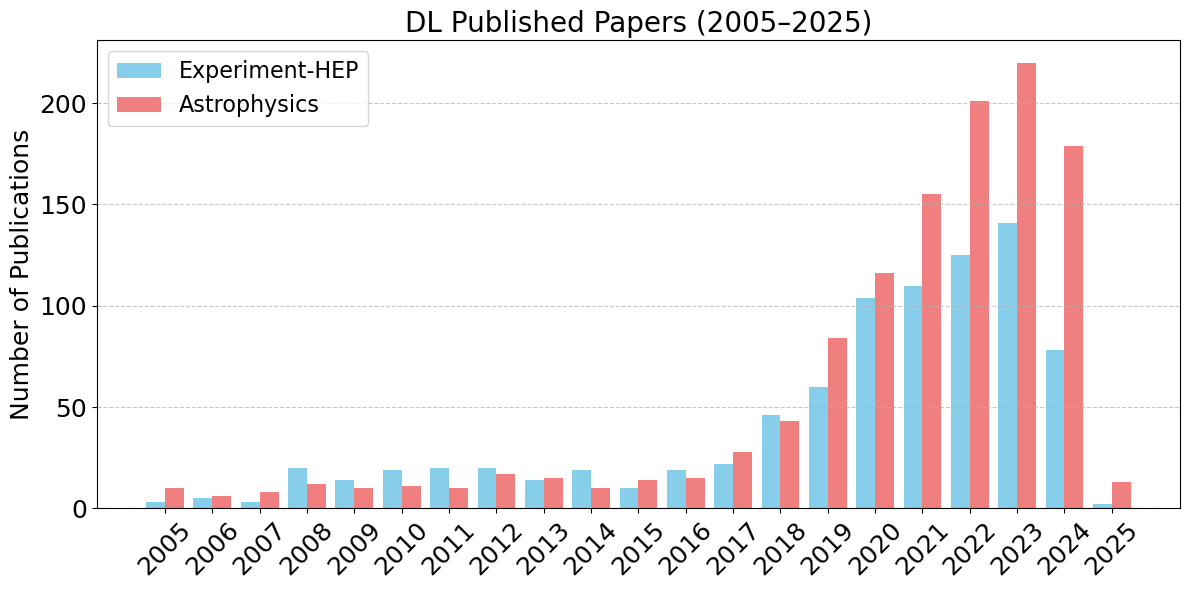

In [3]:
# Set up the figure
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(years))

# Plotting
plt.bar(x - bar_width/2, hep_ex, width=bar_width, label='Experiment-HEP', color='skyblue')
plt.bar(x + bar_width/2, astro, width=bar_width, label='Astrophysics', color='lightcoral')

# Total trend line
#plt.plot(x, total, label='Total', color='black', marker='o', linewidth=2)

# Customize x-axis
plt.xticks(x, years, rotation=45)
#plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of Publications", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title("DL Published Papers (2005–2025)", fontsize=20)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## Comparison of Impurity Measures for Binary Classification

In decision tree algorithms, **impurity measures** are used to evaluate the quality of a split. This plot compares three popular impurity metrics for a binary classification problem as the probability `p` of Class 1 ranges from 0 to 1.

### Definitions

- `p`: Probability of Class 1 (from 0 to 1)
- `q`: Probability of Class 0, computed as `1 - p`

We compare the following measures:

---

### 1. **Gini Index**

\[
\text{Gini} = 1 - (p^2 + q^2)
\]

- Measures the probability of incorrect classification if a random label is assigned based on the class distribution.
- Used by CART decision trees.
- Minimum at 0 or 1 (pure nodes).

---

### 2. **Entropy**

\[
\text{Entropy} = -p \log_2(p) - q \log_2(q)
\]

- Measures the uncertainty in the classification.
- Used in ID3 and C4.5 algorithms.
- Maximum when `p = 0.5` (highest uncertainty).

> Note: We handle log(0) safely using `np.where` to avoid NaNs.

---

### 3. **Misclassification Error**

\[
\text{Error} = 1 - \max(p, q)
\]

- Simpler measure, not as sensitive as entropy or Gini.
- Often used for post-pruning.

---

### Visualization

The plot shows how each impurity measure behaves as `p` changes:
- **Entropy** grows the fastest and peaks at `p = 0.5`.
- **Gini** is smoother but similar in shape.
- **Misclassification** is flatter, highlighting its lower sensitivity.


/tmp/ipykernel_913/1724763492.py:9: RuntimeWarning: divide by zero encountered in log2
  entropy = -(np.where(p != 0, p * np.log2(p), 0) +
/tmp/ipykernel_913/1724763492.py:9: RuntimeWarning: invalid value encountered in multiply
  entropy = -(np.where(p != 0, p * np.log2(p), 0) +
/tmp/ipykernel_913/1724763492.py:10: RuntimeWarning: divide by zero encountered in log2
  np.where(q != 0, q * np.log2(q), 0))
/tmp/ipykernel_913/1724763492.py:10: RuntimeWarning: invalid value encountered in multiply
  np.where(q != 0, q * np.log2(q), 0))


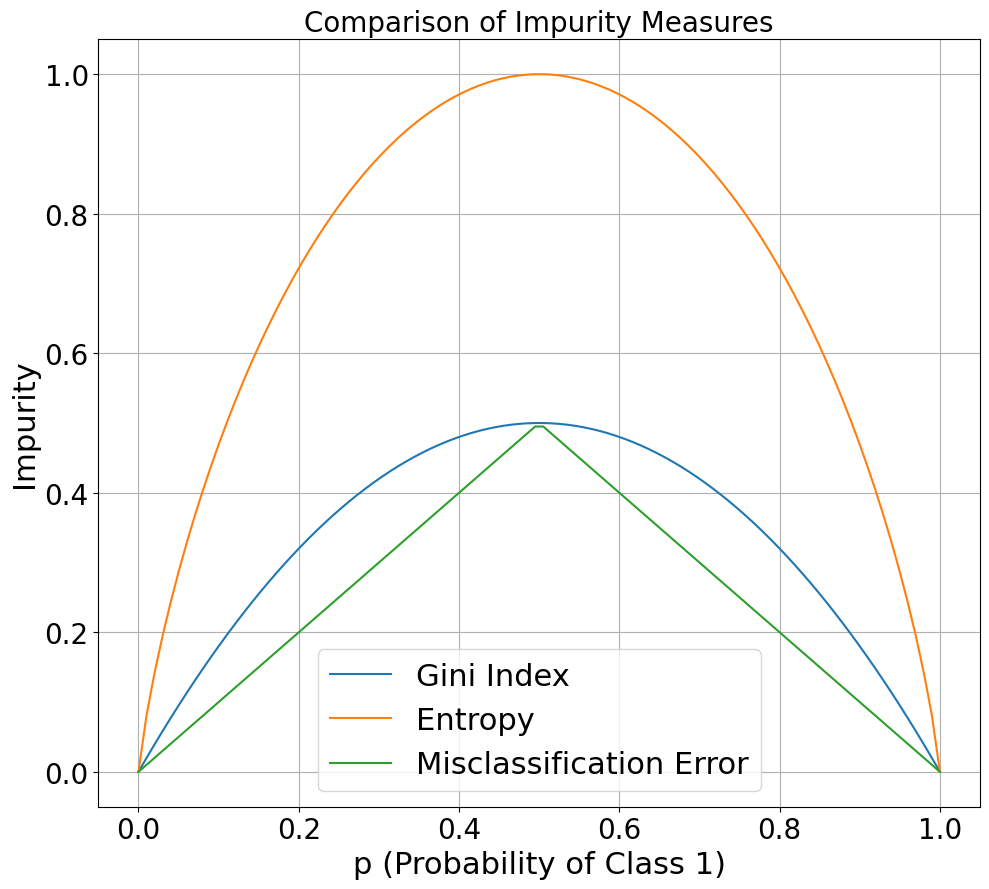

In [4]:
# Class probability from 0 to 1 (binary classification)
p = np.linspace(0., 1, 100)
q = 1 - p

# Gini Index
gini = 1 - (p**2 + q**2)

# Entropy (handling log(0) with np.where)
entropy = -(np.where(p != 0, p * np.log2(p), 0) +
             np.where(q != 0, q * np.log2(q), 0))

# Misclassification Error
misclassification = 1 - np.maximum(p, q)

# Plotting
plt.figure(figsize=(10, 9))
plt.plot(p, gini, label='Gini Index')
plt.plot(p, entropy, label='Entropy')
plt.plot(p, misclassification, label='Misclassification Error')
plt.xlabel('p (Probability of Class 1)', fontsize=22)
plt.ylabel('Impurity', fontsize=22)
plt.title('Comparison of Impurity Measures', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=22)
plt.grid()
plt.tight_layout()

## How Ensemble Size Affects Accuracy

This section demonstrates how the **number of classifiers in an ensemble** can significantly improve the overall classification accuracy, even if each individual classifier has moderate performance.

---

### Concept

In an ensemble model (like **bagging**, **random forest**, or **voting classifiers**), the final decision is often made using **majority voting** among several base classifiers.

If:
- Each classifier has an individual accuracy of `p`
- We use `n` classifiers
- Then, the ensemble is correct if **a majority of them** vote for the correct class.

We model this using the **binomial distribution**.

---

### Formula

The ensemble is correct if at least `⌊n/2⌋ + 1` classifiers vote correctly.  
We compute the probability of this using:

\[
\text{Ensemble Accuracy} = \sum_{k=\lceil n/2 + 1 \rceil}^{n} \binom{n}{k} p^k (1-p)^{n-k}
\]

Where:
- `n` = number of classifiers
- `p` = accuracy of each base classifier

---

### Experiment Setup

- Base classifier accuracy: **70%**
- Ensemble sizes tested: `1, 3, 5, 7, 9, 11, 15`
- For each size, we compute the ensemble accuracy using the formula


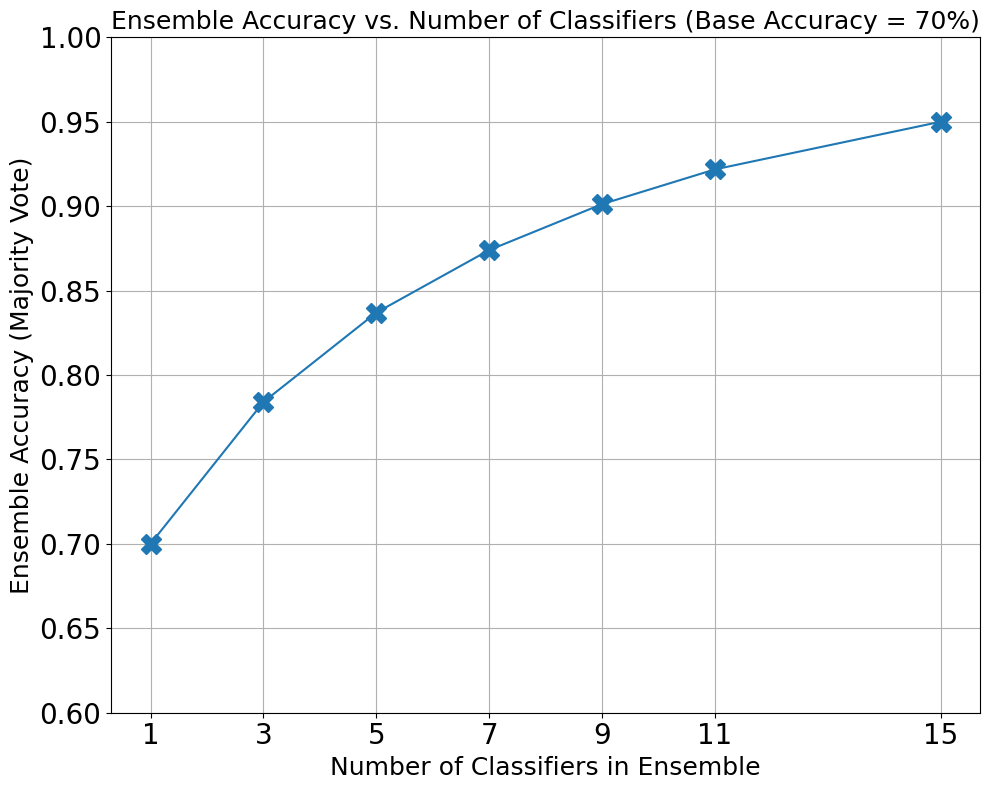

In [5]:
# Function to compute ensemble accuracy
def ensemble_accuracy(n_classifiers, base_accuracy):
    # Number of votes needed for majority
    majority = n_classifiers // 2 + 1
    # Probability of ensemble being correct (sum from majority to all)
    return sum(binom.pmf(k, n_classifiers, base_accuracy) for k in range(majority, n_classifiers + 1))

# Try with different ensemble sizes
ensemble_sizes = [1, 3, 5, 7, 9, 11, 15]
base_accuracy = 0.7  # Each classifier has 70% accuracy

accuracies = [ensemble_accuracy(n, base_accuracy) for n in ensemble_sizes]

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(ensemble_sizes, accuracies, marker='X', markersize=15)
plt.title(f'Ensemble Accuracy vs. Number of Classifiers (Base Accuracy = {base_accuracy * 100:.0f}%)', fontsize=18)
plt.xlabel('Number of Classifiers in Ensemble', fontsize=18)
plt.ylabel('Ensemble Accuracy (Majority Vote)', fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xticks(ensemble_sizes)
plt.ylim(0.6, 1.0)
plt.tight_layout()